
# 🏦 Credit Card Customer Segmentation
## 📊 Data Science Project with K-Means Clustering & PCA

### 🔍 **Objective**
The goal of this project is to segment credit card customers based on their financial behavior using **K-Means clustering**. We use **Exploratory Data Analysis (EDA)**, **Feature Engineering**, **Dimensionality Reduction (PCA)**, and **Clustering Algorithms** to derive meaningful insights.

### 📌 **Business Context**
- Banks and financial institutions need to understand customer **spending behavior**.
- Identifying customer **segments** helps in **targeted marketing, risk management, and credit optimization**.
- This analysis helps businesses **personalize offers** and improve customer engagement.

### 🚀 **Project Workflow**
1. **EDA** – Understand data distribution & patterns.
2. **Feature Engineering** – Handle missing values, apply transformations & standardization.
3. **PCA** – Reduce dimensionality while retaining variance.
4. **K-Means Clustering** – Identify customer segments.
5. **Cluster Profiling** – Interpret & define real-world personas.

---


# 📊 Step 1: Exploratory Data Analysis (EDA)
---
### 🔎 What We Do:
- Explore missing values, outliers, and feature distributions.
### 📌 Key Questions:
- How are customer spending behaviors distributed?
- Are there any outliers?
- Which features are most correlated?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Load the dataset
file_path = "D:/Customer Segmentation Project/CC GENERAL.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Use encoding to avoid errors


In [3]:
# Data Exploration
print("\n🔹 First 5 Rows of Data:")
display(df.head())

print("\n🔹 Dataset Info:")
df.info()

print("\n🔹 Summary Statistics:")
display(df.describe())


🔹 First 5 Rows of Data:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   in

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# Check for Missing Values
print("\n🔹 Missing Values:")
display(df.isnull().sum())



🔹 Missing Values:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


🔹 Number of Duplicates: 0


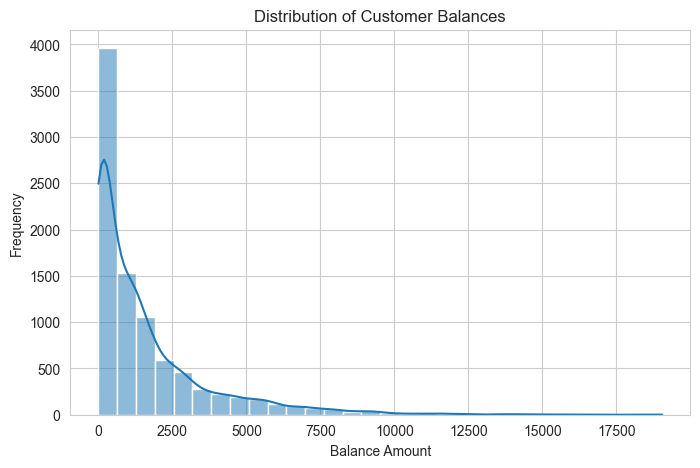

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for Duplicates
print("\n🔹 Number of Duplicates:", df.duplicated().sum())

# Plot Balance Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title("Distribution of Customer Balances")
plt.xlabel("Balance Amount")
plt.ylabel("Frequency")
plt.show()


In [6]:
#overview

df_overview = []
columns = df . columns . drop("CUST_ID")
for i in columns : 
    types = df[i] . dtypes
    unique_data = df[i] . nunique()
                   
    missing_count=df[i].isnull().sum() 
    value_count= df[i].isnull().count() 
    missing_percentage= round(missing_count/value_count*100,2)
        
    duplicated= df.duplicated().sum()    
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])
        
df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]




df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,BALANCE,float64,8871,0,0.000000,0
1,BALANCE_FREQUENCY,float64,43,0,0.000000,0
2,PURCHASES,float64,6203,0,0.000000,0
3,ONEOFF_PURCHASES,float64,4014,0,0.000000,0
4,INSTALLMENTS_PURCHASES,float64,4452,0,0.000000,0
5,CASH_ADVANCE,float64,4323,0,0.000000,0
6,PURCHASES_FREQUENCY,float64,47,0,0.000000,0
7,ONEOFF_PURCHASES_FREQUENCY,float64,47,0,0.000000,0
8,PURCHASES_INSTALLMENTS_FREQUENCY,float64,47,0,0.000000,0
9,CASH_ADVANCE_FREQUENCY,float64,54,0,0.000000,0


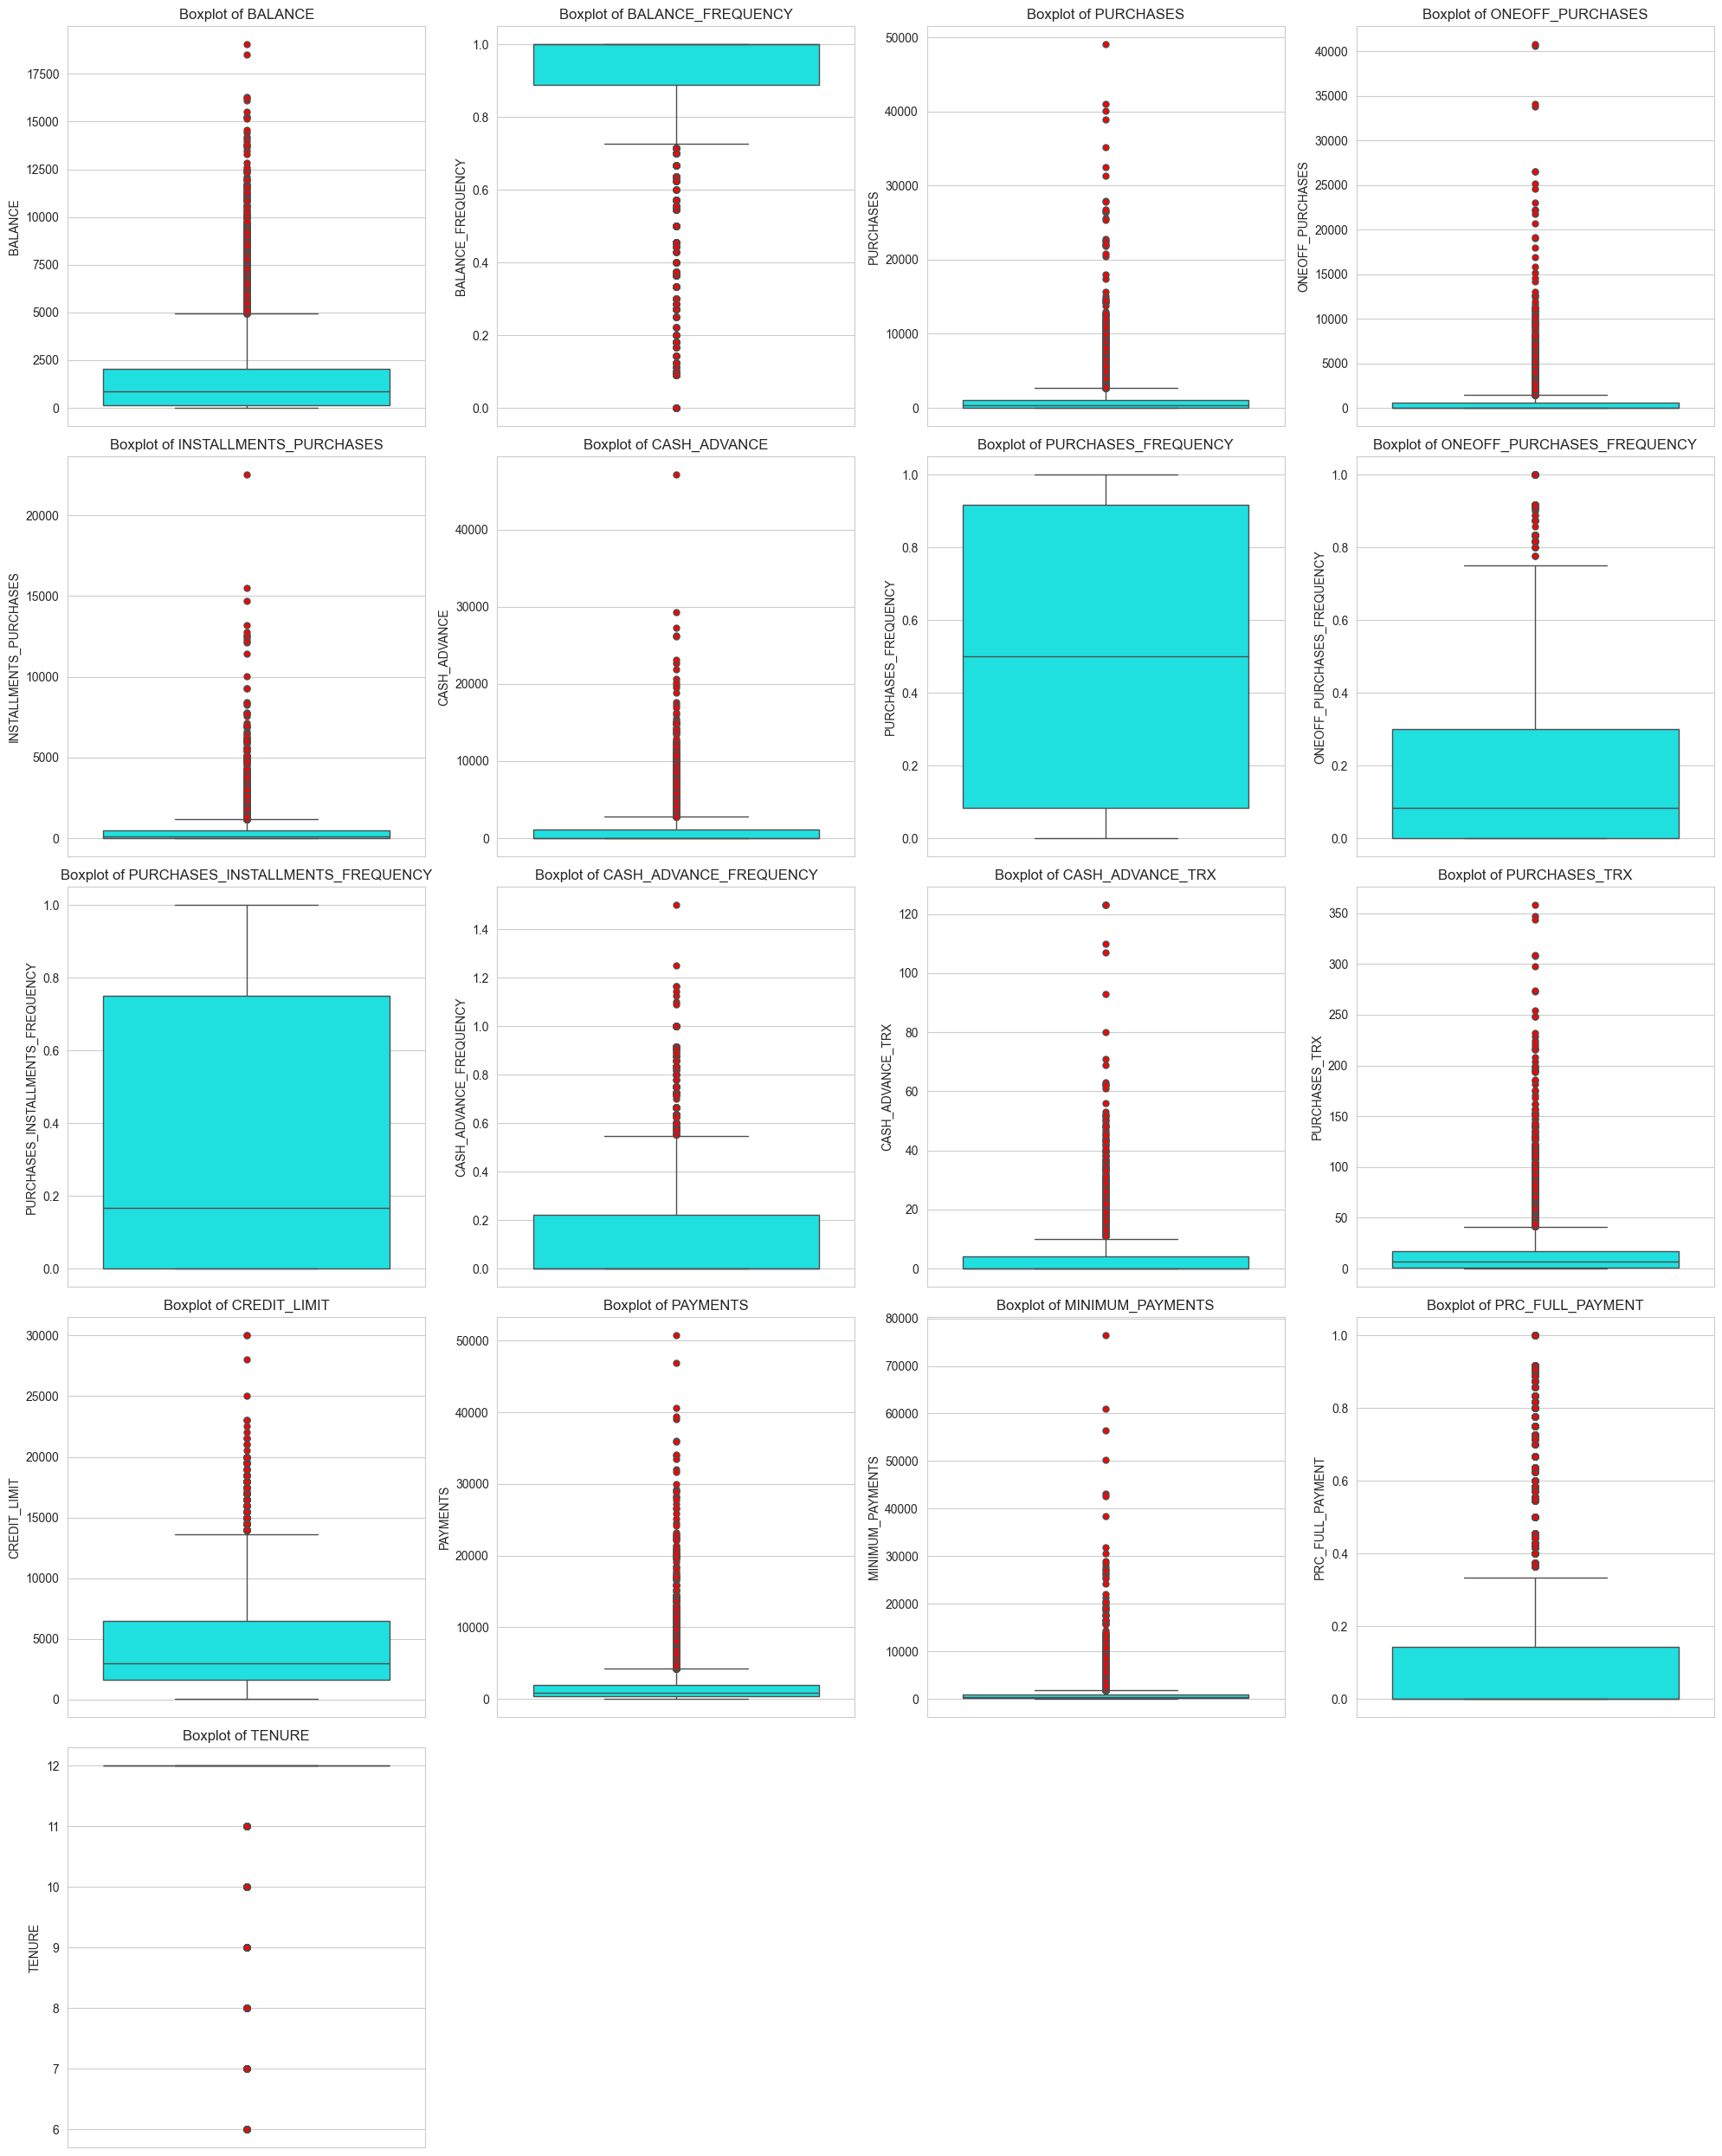

In [7]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Calculate dynamic grid size
num_plots = len(numeric_cols)
rows = math.ceil(num_plots / 4)  # Auto-adjust rows based on column count
cols = min(4, num_plots)  # Max 4 columns

# Step 3: Boxplot Before Handling Outliers
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], color='aqua', flierprops={'markerfacecolor': 'red', 'markersize': 5}, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [8]:
# Step 4: Finding Outliers Using IQR Method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Detect Outliers
count_out = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

# Store Outlier Count in DataFrame
df_count_out = pd.DataFrame(count_out, columns=['Outlier_Count'])

# Display Outlier Count Table
import IPython.display as display
display.display(df_count_out)



,Outlier_Count
BALANCE,695
BALANCE_FREQUENCY,1493
PURCHASES,808
ONEOFF_PURCHASES,1013
INSTALLMENTS_PURCHASES,867
CASH_ADVANCE,1030
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,782
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,525


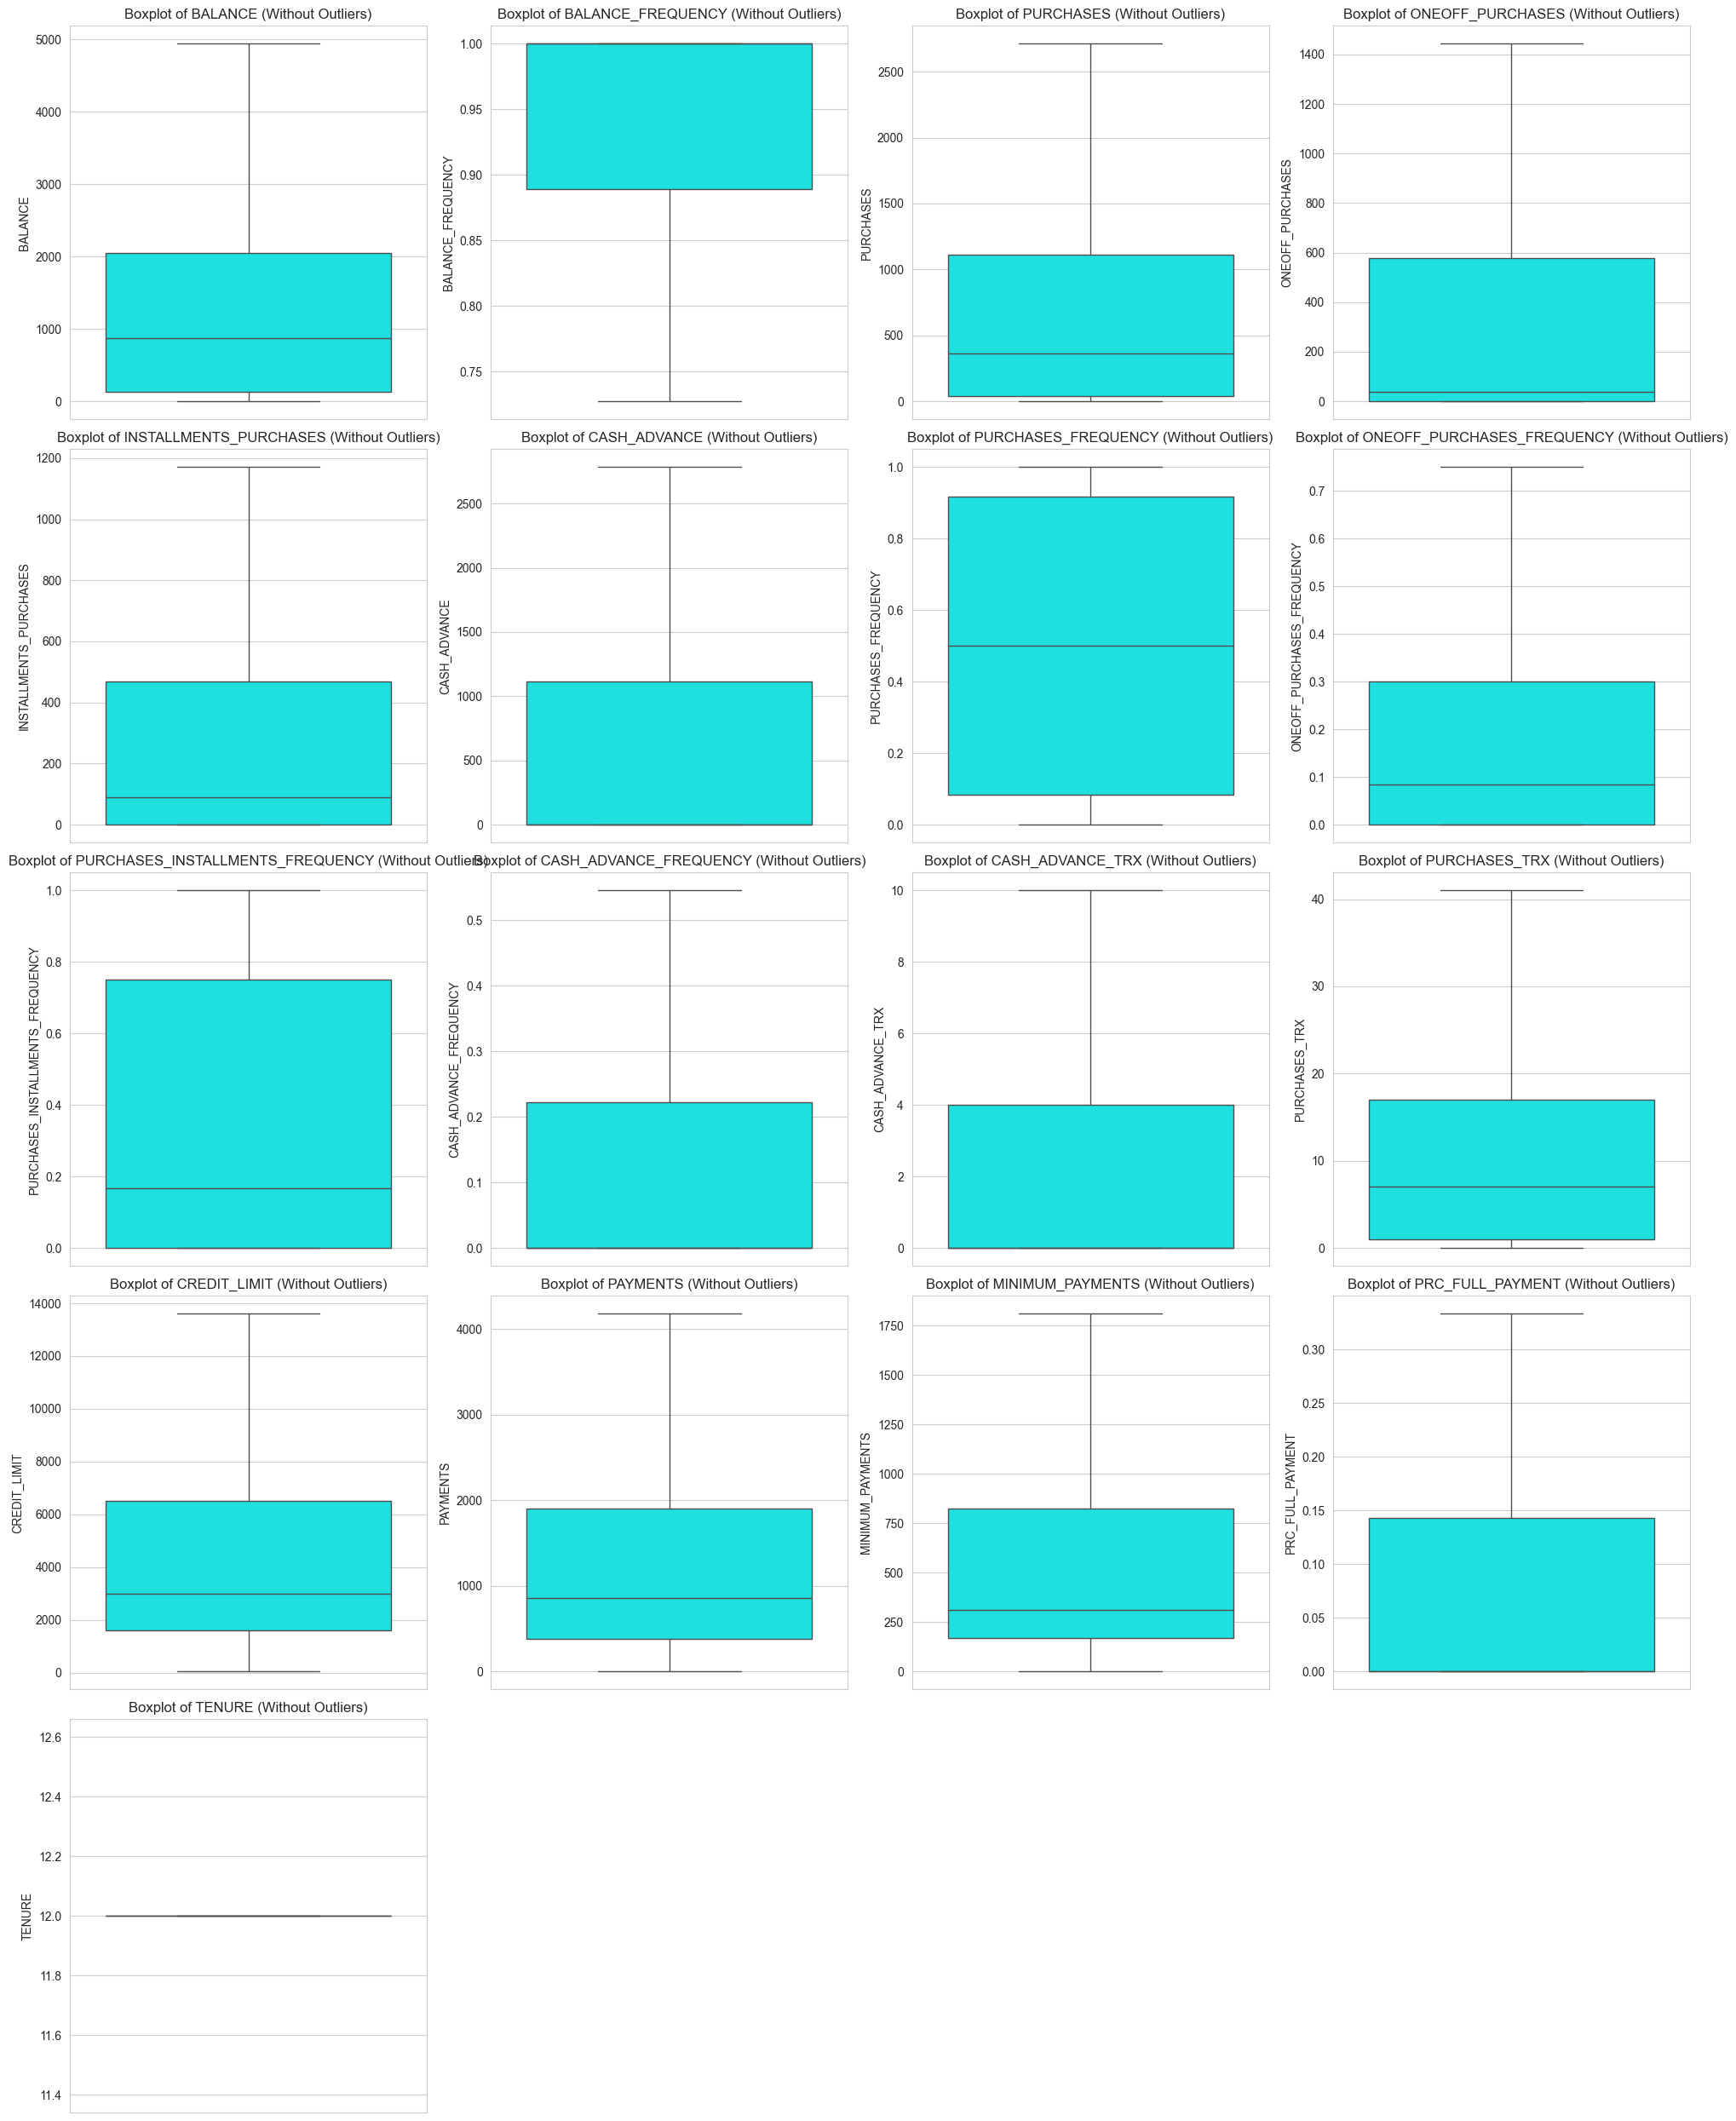

In [9]:
# Step 5: Boxplot After Removing Outliers
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], showfliers=False, color='aqua', ax=axes[i])  # Hides outliers
    axes[i].set_title(f"Boxplot of {col} (Without Outliers)")

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [10]:
#Handling Missing Values 

nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[nulls_value]
df.drop([5203], axis=0, inplace=True)  # Drops the row with missing value
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8945,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8946,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8947,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [11]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]


,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


In [12]:
minpay = df['MINIMUM_PAYMENTS'].copy() # Copy column
payments_mean = np.mean(df['PAYMENTS']) # Calculate mean of PAYMENTS

i = 0
for payments, minpayments in zip(df['PAYMENTS'], df['MINIMUM_PAYMENTS'].isna()):
    if (payments == 0) and (minpayments == True):  
        minpay[i] = 0  # If PAYMENTS = 0, MINIMUM_PAYMENTS = 0
    elif (0 < payments < payments_mean) and (minpayments == True):  
        minpay[i] = payments  # If PAYMENTS is below mean, set MINIMUM_PAYMENTS = PAYMENTS
    elif minpayments == True:  
        minpay[i] = payments_mean  # Otherwise, set it to the mean of PAYMENTS
    i += 1


In [13]:
print(f'Missing (before): {df.isna().sum().sum()}')  # Before filling
print(f'Missing (after): {minpay.isna().sum().sum()}')  # After filling

df['MINIMUM_PAYMENTS'] = minpay.copy()  # Update the dataset


Missing (before): 313
Missing (after): 0


In [14]:
#Removing Outliers 

df = df[(df['BALANCE']<15000)]
df = df[(df['PURCHASES']<40000)]
df = df[(df['ONEOFF_PURCHASES']<30000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['MINIMUM_PAYMENTS']<60000)]
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace = True)

print(df.isnull().sum())

print("Dataset shape after cleaning:", df.shape)


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Dataset shape after cleaning: (8931, 18)


In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000,8931.000000
mean,1543.459045,0.877133,974.004040,571.353163,402.951697,972.291315,0.489733,0.201806,0.363822,0.134928,3.234016,14.539805,4468.282178,1703.826692,815.181824,0.153696,11.517411
std,2015.972018,0.236971,1886.385393,1438.938299,840.687831,2039.128338,0.401289,0.297671,0.397219,0.199695,6.707160,24.080898,3591.046146,2735.062280,2083.094948,0.292402,1.337798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.000000,6.000000
25%,127.851983,0.888889,39.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,383.125845,164.264349,0.000000,12.000000
50%,870.774939,1.000000,360.100000,37.500000,88.560000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,854.446327,294.438262,0.000000,12.000000
75%,2033.525721,1.000000,1106.160000,574.305000,466.695000,1113.138205,0.916667,0.285714,0.750000,0.222222,4.000000,17.000000,6500.000000,1895.272891,790.691055,0.142857,12.000000
max,14581.459140,1.000000,32539.780000,26547.430000,14686.100000,29282.109150,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,56370.041170,1.000000,12.000000


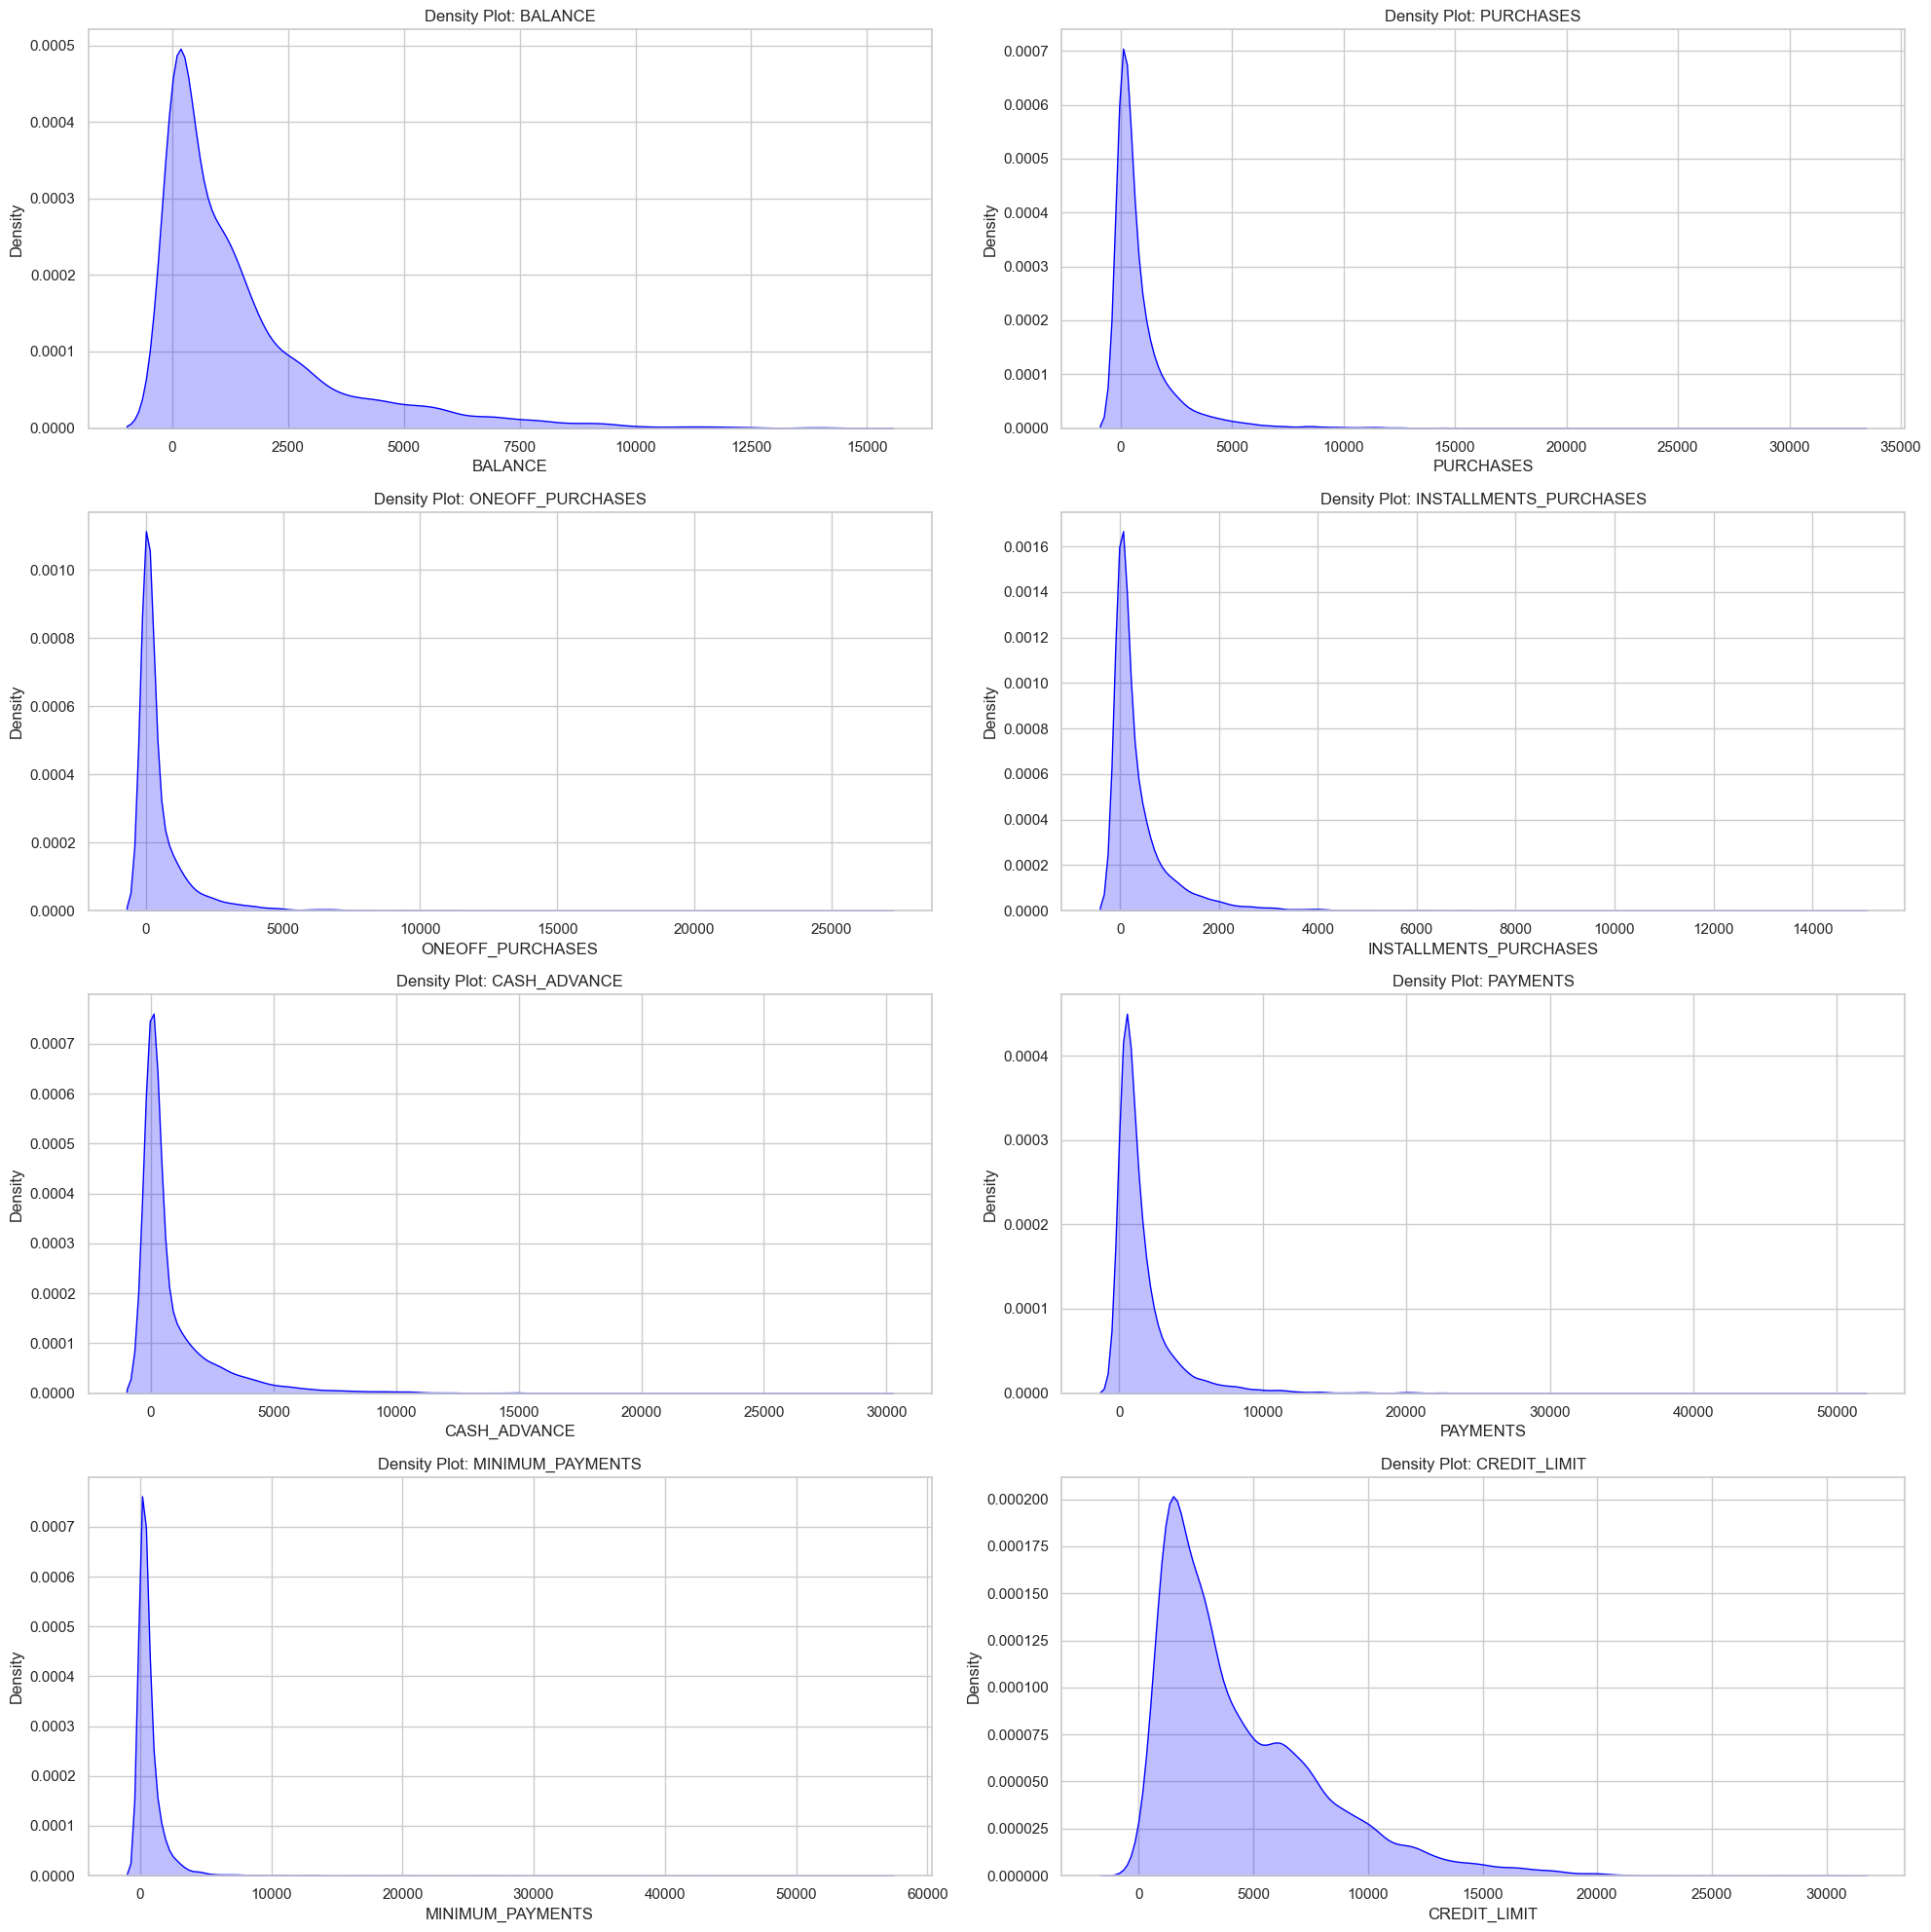

In [16]:
# 📊 Exploratory Data Analysis (EDA) for Credit Card Customer Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

#Update plotting style
sns.set(style="whitegrid")

# Density Plots for Key Financial Features
kde_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT']

plt.figure(figsize=(20, 20))
for i, col in enumerate(kde_features):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(df[col], fill=True, color='blue')
    plt.title(f"Density Plot: {col}")
plt.tight_layout()
plt.show()

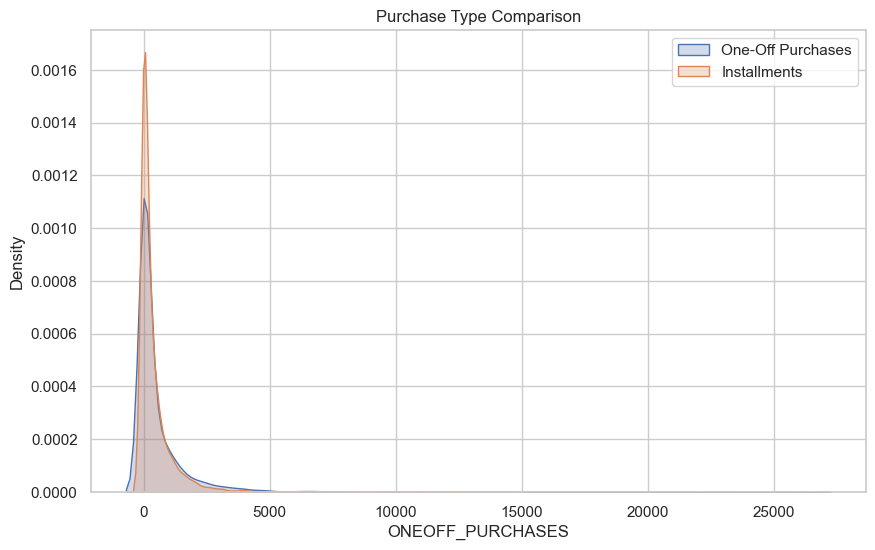

In [17]:
# Transaction Behavior: One-Off vs Installment Purchases
plt.figure(figsize=(10,6))
sns.kdeplot(df['ONEOFF_PURCHASES'], label='One-Off Purchases', fill=True)
sns.kdeplot(df['INSTALLMENTS_PURCHASES'], label='Installments', fill=True)
plt.title("Purchase Type Comparison")
plt.legend()
plt.show()

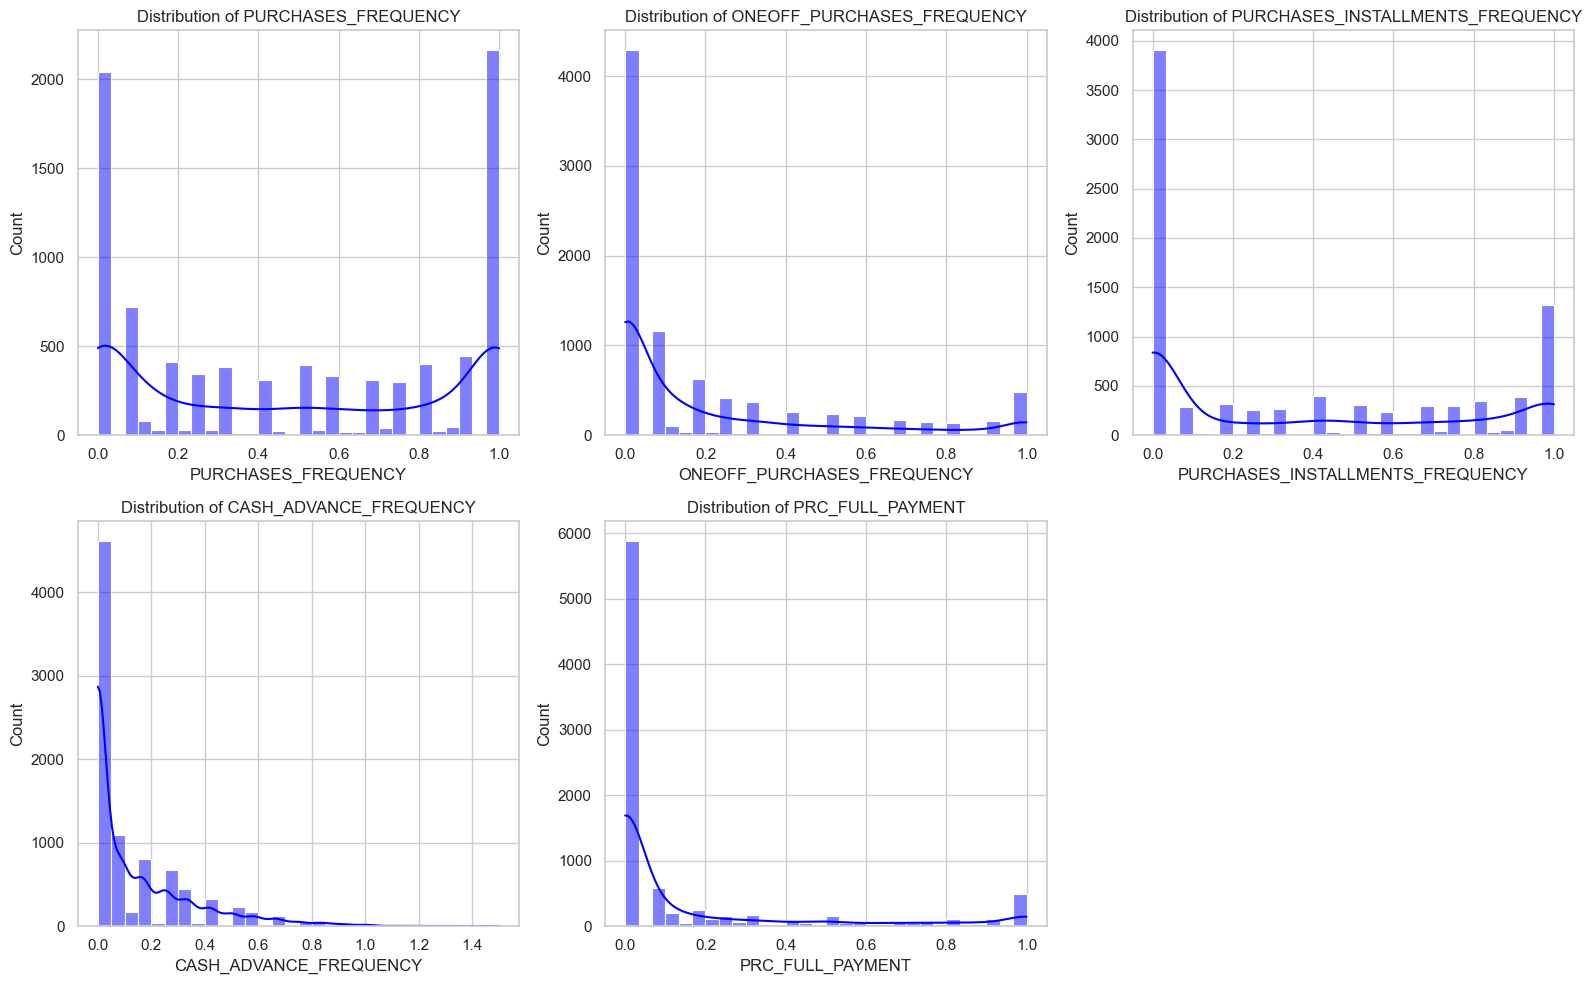

In [18]:
# Frequency-Based Features
freq_features = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

plt.figure(figsize=(16, 10))
for i, col in enumerate(freq_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

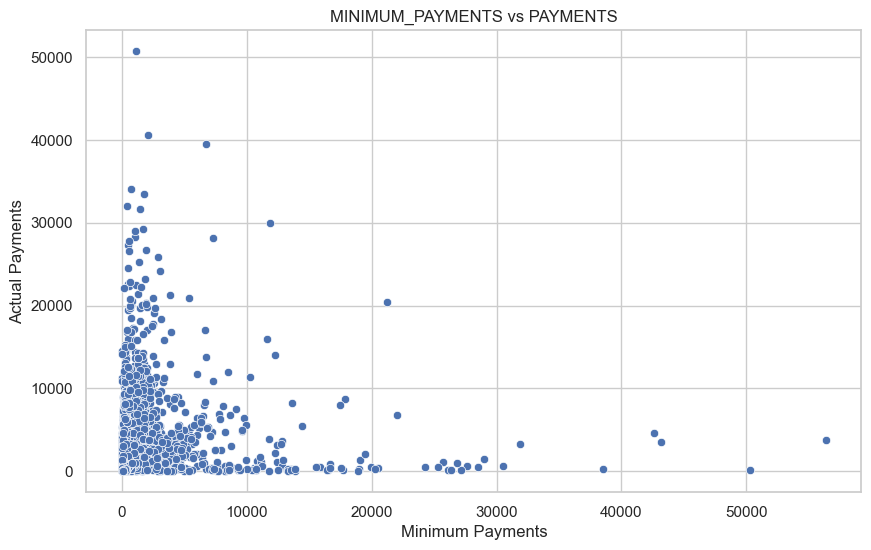

In [19]:
# Payment Behavior
plt.figure(figsize=(10,6))
sns.scatterplot(x='MINIMUM_PAYMENTS', y='PAYMENTS', data=df)
plt.title("MINIMUM_PAYMENTS vs PAYMENTS")
plt.xlabel("Minimum Payments")
plt.ylabel("Actual Payments")
plt.show()


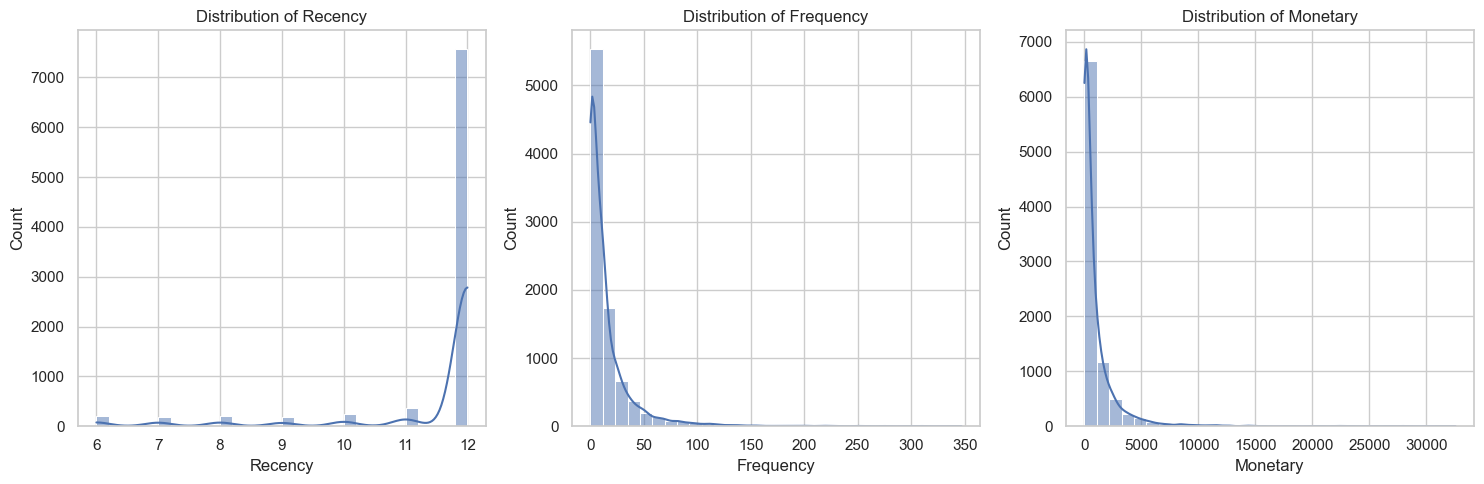

In [20]:
# Feature Engineering: RFM-style Breakdown
# Assume TENURE as Recency, PURCHASES_TRX as Frequency, PURCHASES as Monetary
rfm_df = df[['TENURE', 'PURCHASES_TRX', 'PURCHASES']].copy()
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(15, 5))
for i, col in enumerate(rfm_df.columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(rfm_df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# ⚙️ Step 2: Feature Engineering & PCA
---
### 🔎 What We Do:
- Handle missing values, normalize data, and apply transformations.
- Reduce dimensionality using PCA.
### 📌 Why PCA?
- Helps in visualizing clusters in fewer dimensions.
- Reduces redundancy in correlated features.


In [21]:
from scipy.stats import skew
import numpy as np

# Check skewness before transformation
kde_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT']

skewed_before = df[kde_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("🔹 Skewness Before Transformation:\n")
print(skewed_before)

# Apply log1p transformation to only highly skewed features
# Define threshold (e.g., abs(skewness) > 1)
skew_threshold = 1
to_transform = skewed_before[abs(skewed_before) > skew_threshold].index

for col in to_transform:
    df[col] = np.log1p(df[col])  # Safe for 0s

# Check skewness again after transformation
skewed_after = df[to_transform].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\n🔹 Skewness After Transformation (Only Transformed Columns):\n")
print(skewed_after)


🔹 Skewness Before Transformation:

MINIMUM_PAYMENTS          11.365492
ONEOFF_PURCHASES           7.299131
PURCHASES                  6.086452
INSTALLMENTS_PURCHASES     5.929425
PAYMENTS                   5.470228
CASH_ADVANCE               4.336877
BALANCE                    2.196750
CREDIT_LIMIT               1.489923
dtype: float64

🔹 Skewness After Transformation (Only Transformed Columns):

CASH_ADVANCE              0.263046
ONEOFF_PURCHASES          0.184046
INSTALLMENTS_PURCHASES   -0.025150
CREDIT_LIMIT             -0.108054
PURCHASES                -0.768004
BALANCE                  -0.865644
MINIMUM_PAYMENTS         -1.197634
PAYMENTS                 -1.796902
dtype: float64


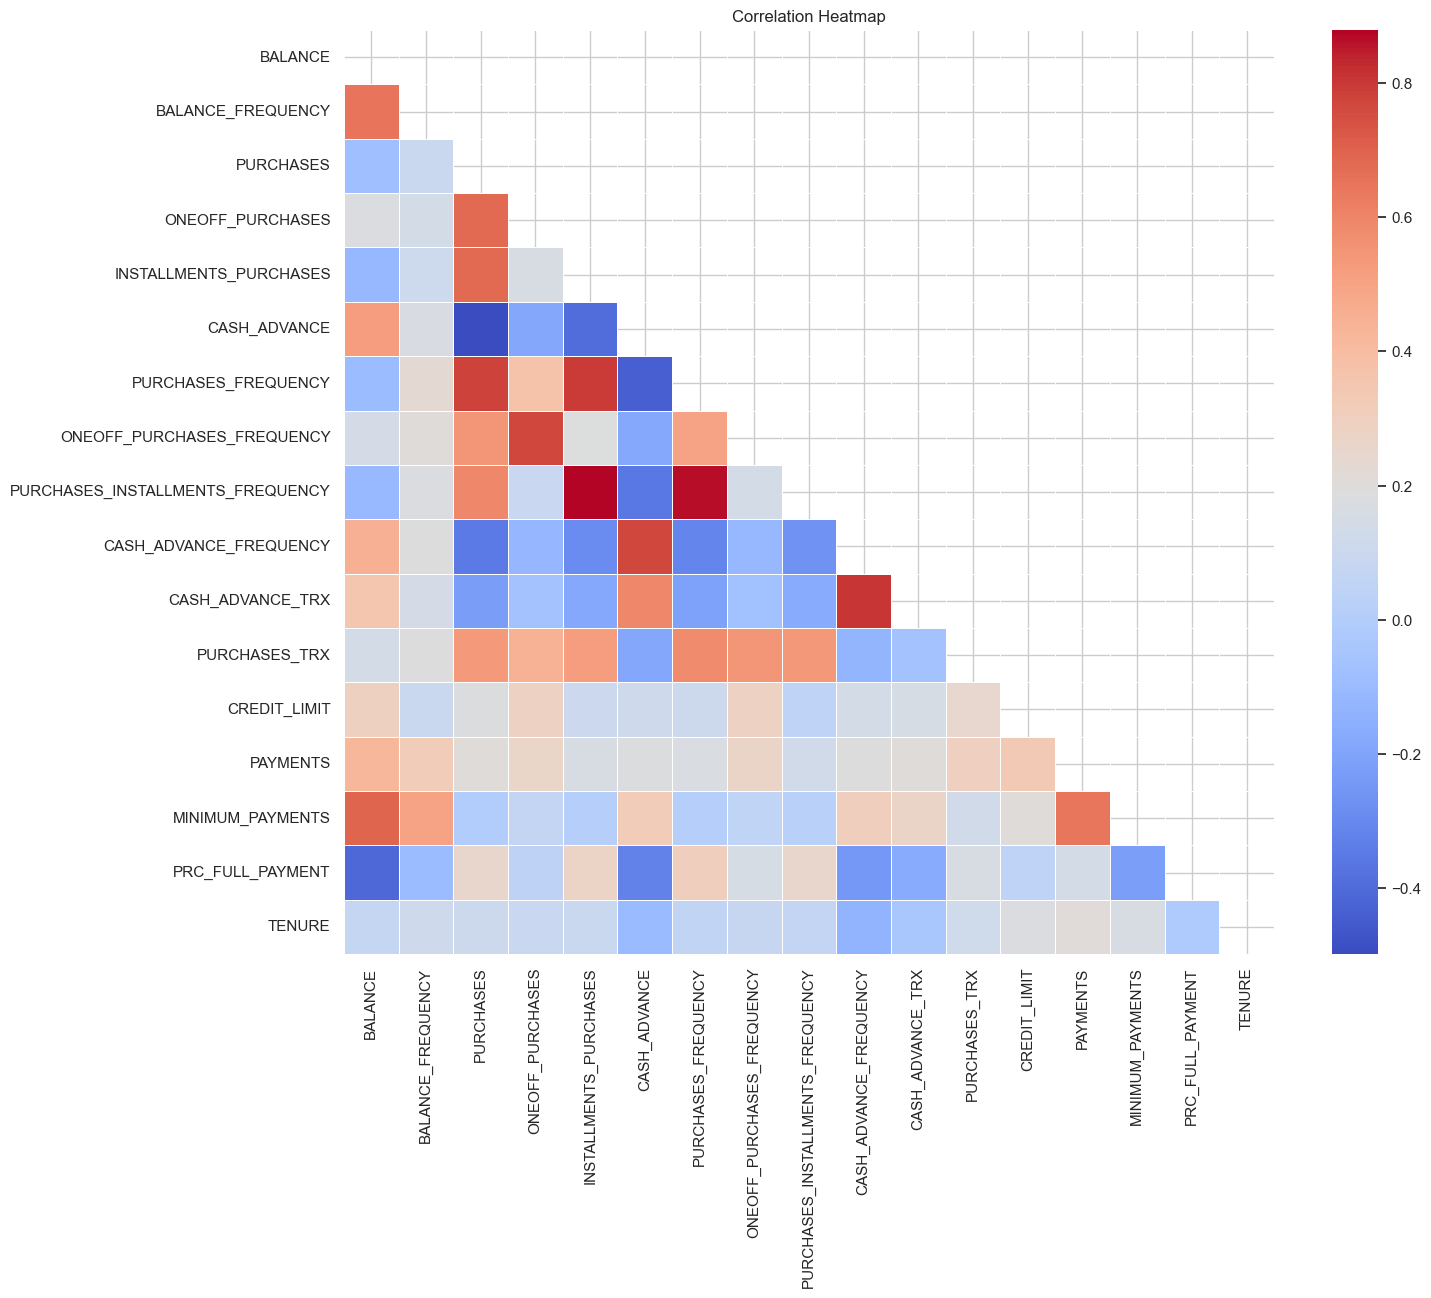

In [23]:
# Drop non-numeric columns (like CUST_ID) for correlation calculation
df_corr = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = df_corr.corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


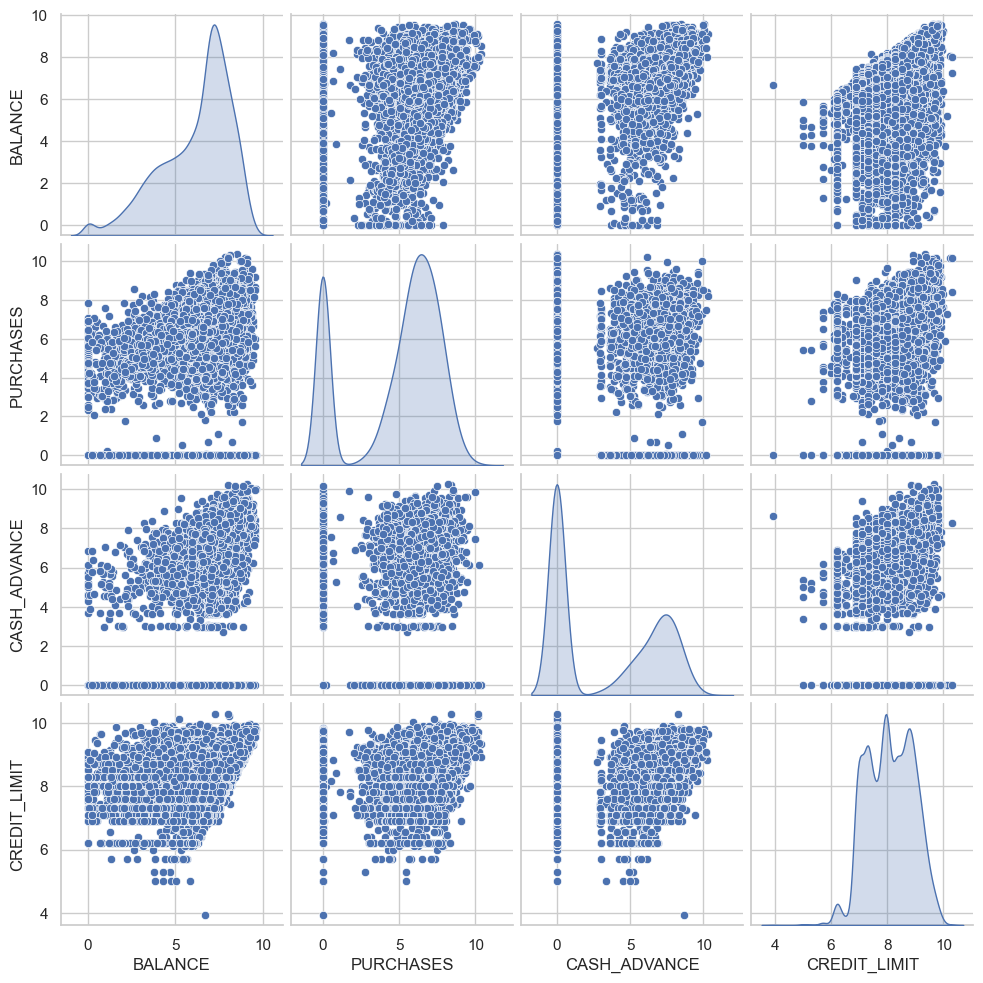

In [25]:
# Optional Pairplot
selected_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

# Keep only numerical features
df_scaled = df.select_dtypes(include=['float64', 'int64'])

# Scale the features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_scaled)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_array, columns=df_scaled.columns)

# Preview scaled data
print(scaled_df.head())


    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -1.204169          -0.248785  -0.111555         -0.986830   
1  0.953316           0.134866  -1.679754         -0.986830   
2  0.829198           0.518517   0.603560          1.065199   
3  0.628547          -1.016087   0.830604          1.269245   
4  0.274605           0.518517  -0.707217         -0.112804   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.396778     -0.930394            -0.805116   
1               -1.086717      1.530140            -1.220469   
2               -1.086717     -0.930394             1.271643   
3               -1.086717      0.565327            -1.012794   
4               -1.086717     -0.930394            -1.012794   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.677987                         -0.706172   
1                   -0.677987                         -0.915974   
2                    2.681612      

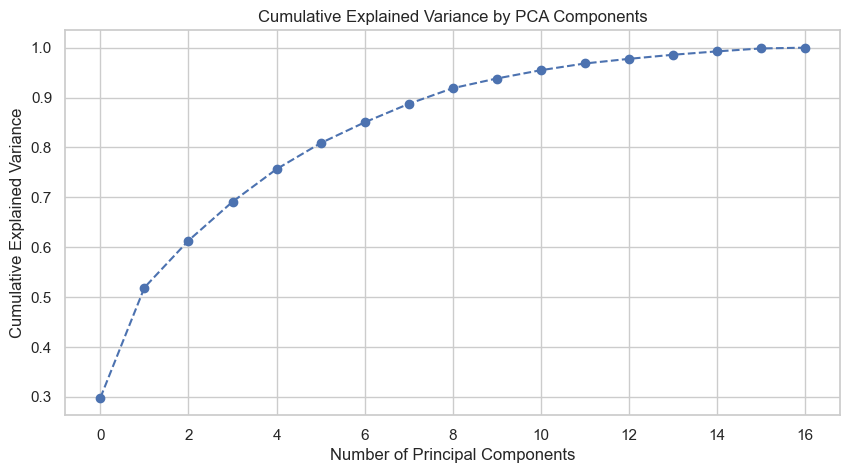

In [28]:
from sklearn.decomposition import PCA

# Initialize PCA (we'll keep all components initially)
pca = PCA()
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(scaled_df.shape[1])])

# Scree plot: how much variance each PC explains
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


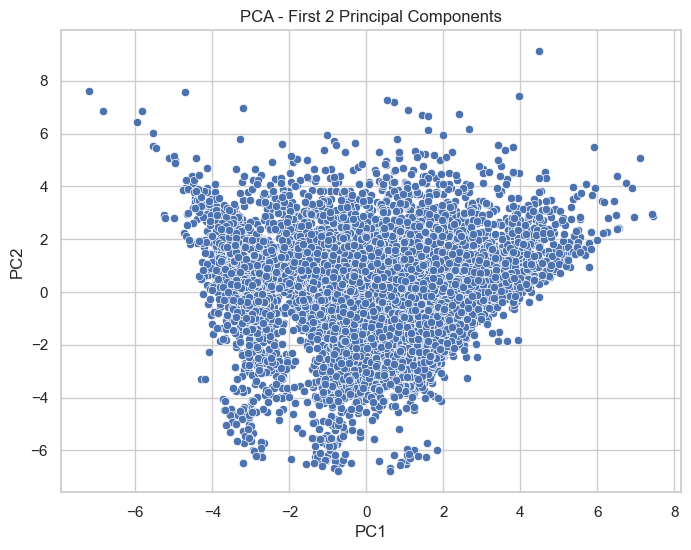

In [29]:
# Plot first 2 Principal Components
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA - First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [31]:
from IPython.display import display
import numpy as np
import pandas as pd

# Print how much each PC explains
explained = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative': np.cumsum(pca.explained_variance_ratio_)
})

# Ensure display is correctly used
display(explained.head(10))  # Show top 10 components


,Principal Component,Explained Variance Ratio,Cumulative
0,PC1,0.297886,0.297886
1,PC2,0.221008,0.518894
2,PC3,0.094150,0.613044
3,PC4,0.077871,0.690915
4,PC5,0.065480,0.756395
5,PC6,0.052114,0.808509
6,PC7,0.041680,0.850189
7,PC8,0.037018,0.887206
8,PC9,0.031481,0.918687
9,PC10,0.019468,0.938156


In [32]:
# Keep only the first 6 PCA components
pca_n_components = 6
pca_reduced_df = pca_df.iloc[:, :pca_n_components]  # Select first 6 PCs

# Display first few rows
print(pca_reduced_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.664479 -2.393769 -0.410739 -0.923485 -0.365761 -0.321747
1 -2.884592  1.392166 -0.078434 -0.720014  1.485056  0.555446
2  1.416105  1.128116  2.714437 -0.797877 -0.775802  0.067377
3 -1.130576 -2.686020  2.604582  1.421446 -1.470373 -2.890059
4 -1.316022 -0.913659  0.653261 -1.721129 -0.620354  0.467107


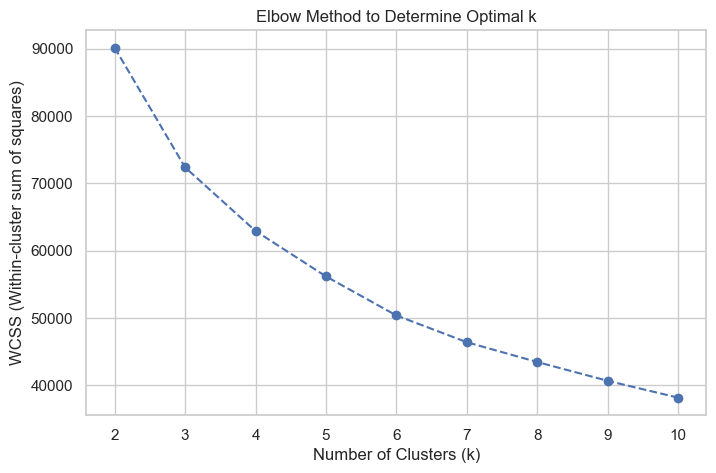

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different k values (2 to 10 clusters)
wcss = []  # Within-cluster sum of squares

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_reduced_df)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


# 🤖 Step 3: K-Means Clustering
---
### 🔎 What We Do:
- Determine the optimal number of clusters (Elbow Method & Silhouette Score).
- Apply K-Means and visualize clusters.
### 📌 Why K-Means?
- Works well for **unsupervised segmentation**.
- Helps group similar customers based on behavior.


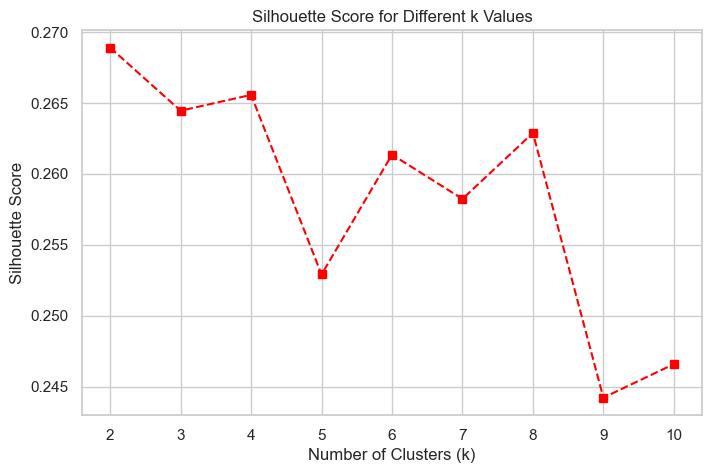

In [34]:
from sklearn.metrics import silhouette_score

# Try different k values and compute silhouette scores
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_reduced_df)
    score = silhouette_score(pca_reduced_df, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='s', linestyle='--', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()


In [37]:
# Apply K-Means with best k
best_k = 4  # Based on Elbow + Silhouette results
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_reduced_df)

# Add cluster labels to dataset
pca_reduced_df.loc[:, 'Cluster'] = cluster_labels
df.loc[:, 'Cluster'] = cluster_labels

# Display cluster counts
print(df['Cluster'].value_counts())


Cluster
1    3027
0    2362
2    2181
3    1361
Name: count, dtype: int64


# 🔍 Step 4: Cluster Profiling & Business Insights
---
### 🔎 What We Do:
- Analyze spending patterns across clusters.
- Define **customer personas** based on their financial behavior.
### 📌 Key Business Insights:
- Who are the **high-value customers**?
- Which group needs **credit risk monitoring**?
- How can we **personalize offers**?


,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
Cluster,,,,,,,,
0,6.966991,7.517579,6.938380,5.154386,2.478089,8.555618,7.530657,6.185101
1,7.397460,2.057537,1.701404,0.588363,6.535979,8.078571,6.855778,6.415871
2,5.314481,6.148039,1.354382,6.009222,1.038856,7.726196,6.365391,5.603391
3,3.334372,4.636440,2.995333,2.076996,1.261111,7.900374,4.924081,3.795678


<Figure size 1200x600 with 0 Axes>

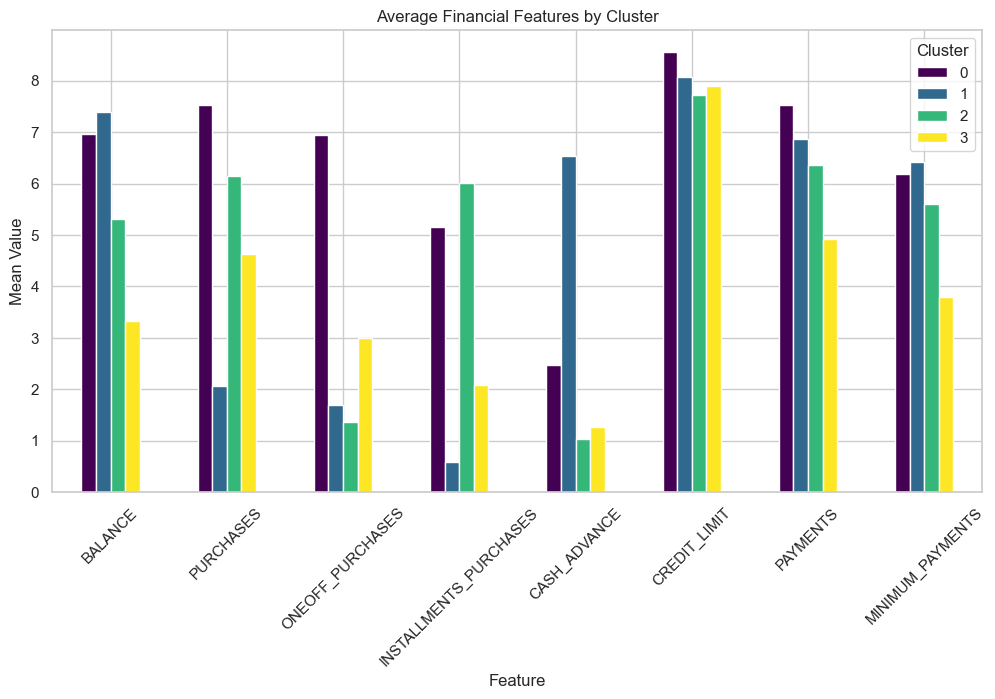

In [41]:
# Calculate mean values for key financial features by cluster
cluster_means = df.groupby('Cluster')[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                                       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                                       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']].mean()

# Display the mean values per cluster
import IPython.display as display
display.display(cluster_means)

import matplotlib.pyplot as plt

# Transpose DataFrame for better bar plot visualization
plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar', figsize=(12,6), colormap='viridis')

# Formatting
plt.title("Average Financial Features by Cluster")
plt.xlabel("Feature")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.legend(title="Cluster", loc="upper right")

plt.show()
